# Use Python <3.10

This package heavily utilizes the pyMuellerMat package that makes Mueller matrices from "system dictionaries" detailing the instrument configuration. Make sure to clone the physical_models branch of pyMuellerMat at https://github.com/maxwellmb/pyMuellerMat/.

In [1]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
from instruments import *
from physical_models import *
from matplotlib.ticker import MultipleLocator
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "lines.linewidth": 3,
})

# Step 1: Write FITS Info to CSV

In [2]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes_3/cubes'
raw_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Raw_3/internal-cal'

# Write all bins to csvs
for bin in range(0,22):
   csv_filepath = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
   write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin0.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin1.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin2.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin3.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin4.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin5.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin6.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin7.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cu

# Step 2 (Optional): Split Up Your Data

In [7]:
# This is specific to what I'm fitting
# I'm going to split the csvs in half because one half has the pickoff in and the other half has it out

# sort csvs into with and without pickoff
def split_csv(file_path):
    file_path = Path(file_path)
    if not file_path.exists() or file_path.suffix != ".csv":
        raise ValueError("Please provide a valid .csv file.")

    # Read original CSV
    df = pd.read_csv(file_path)

    # Split into two DataFrames
    df_with_pickoff = df.iloc[72:].reset_index(drop=True)
    df_no_pickoff = df.iloc[:72].reset_index(drop=True)

    # Create new file names
    stem = file_path.stem  # without .csv
    suffix = file_path.suffix
    parent = file_path.parent
    nopickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff')
    pickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff')
    with_pickoff_path = pickoff_folder / f"{stem}_with_pickoff{suffix}"
    no_pickoff_path = nopickoff_folder / f"{stem}_no_pickoff{suffix}"

    # Save the new CSVs
    df_no_pickoff.to_csv(no_pickoff_path, index=False)
    df_with_pickoff.to_csv(with_pickoff_path, index=False)

    print(f"Saved: {no_pickoff_path}")
    print(f"Saved: {with_pickoff_path}")

# split all csvs
for bin in range(0,22):
     csv_path = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
     split_csv(csv_path)

Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin0_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin0_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin1_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin1_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin2_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin2_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin3_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin3_with_pickoff.csv
Saved: /Users/thomasmcintosh/Des

# Step 3 (Optional): Plot Your Data With the Original Model 

In [6]:
# Define a csv filepath that we just created from whatever wavelength bin you want to visualize
# I have bin 15 here, I would recommend using a bin in the middle to get a good idea,
# bin zero can be finicky
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin15_no_pickoff.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  144
[-5.29888721e-01  3.94488401e+08 -3.97088140e-01  3.94805602e+08
 -2.57682445e-02  3.91964053e+08  3.80099386e-01  3.91815292e+08
  5.88668204e-01  3.92806254e+08]
Interleaved Stds
Length:  144
[4.26985511e-05 1.98617321e+04 4.61899150e-05 1.98697157e+04
 5.04931710e-05 1.97980821e+04 4.67278203e-05 1.97943248e+04
 4.07871675e-05 1.98193404e+04]
Configuration List
Length:  72
[{'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 11.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 33.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 56.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 78.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 90.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'th

In [3]:

# Define wavelength bins for CHARIS

wavelength_bins = np.array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
2139.4131, 2213.4641, 2290.0781, 2369.3441])

# Loading in past fits from Joost t Hart 2021

offset_imr = 0.13214 # derotator offset
offset_hwp = -0.99287 # HWP offset
offset_cal = 0.49797 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"delta_theta": offset_cal },
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)
print(system_mm.evaluate())



[[0.49996223 0.4998867  0.00869012 0.        ]
 [0.49996223 0.4998867  0.00869012 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


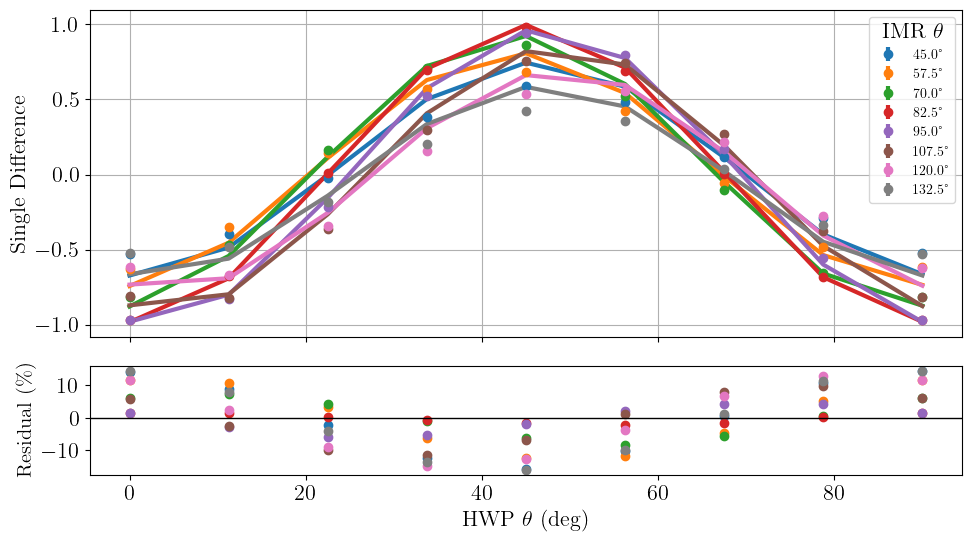

Residuals range: -0.1601151693173976 0.14491331913953232


In [7]:

# Get our model retardances from Joost t Hart physical models

p = [HWP_retardance(wavelength_bins,1.64601,1.28540)[15], IMR_retardance(wavelength_bins,259.12694)[15]]


# Define what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# Generate our modeled left and right beam intensities

LR_intensities = model(p, system_parameters, system_mm, configuration_list)

# Process these into interleaved single norm differences and sums

diffs_sums = process_model(LR_intensities, 'CHARIS')

# Plot the modeled and observed values

fig, ax = plot_data_and_model(interleaved_values, interleaved_stds, diffs_sums,configuration_list, wavelength= wavelength_bins[4], mode='CHARIS',title='')
ax.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  
)
ax.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
ax.minorticks_on()
fig.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/overleaf_plots/MCMC_model_single_diff_vs_hwp_1931.png',bbox_inches='tight', dpi=600)
# Print residuals (will be useful later to see if your fit improved at a quick glance)
residuals = interleaved_values[::2] - diffs_sums[::2]
print("Residuals range:", residuals.min(), residuals.max())


# Step 4: Fit New Model

I made a function that does everything quickly but is also tailored to the parameters I am fitting. My function updates the model, puts the pyMuellerMat compatible system dictionary in a JSON file, and optionally saves a plot of the model vs data to a specified path.
If you want to use it for different parameters than the ones detailed in the docstring, 
you'll have to update the function a bit (which shouldn't take too long). 

NOTE: I am only fitting for the retardances and lp diattenuation here, not the offsets, to preserve correct errors. Previously, I did this same fitting procedure including the offsets, and their values were extremeley consistent across wavelength bins (std ~10^-13). I fixed these averages for the offset angles. For unknown reasons, when I did that first fit the errors were nonsensical for the offsets. 

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1019e+08                                    1.78e+09    
       1              2         2.3729e+07      8.65e+07       9.15e-02       2.95e+08    
       2              3         2.2599e+07      1.13e+06       1.14e-02       1.01e+06    
       3              4         2.2599e+07      3.66e+01       9.48e-05       8.73e+03    
       4              5         2.2599e+07      6.27e-03       1.41e-06       1.34e+02    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.1019e+08, final cost 2.2599e+07, first-order optimality 1.34e+02.
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.052e+03 -2.840e+02 ... -9.918e+02 -1.117e+03]
           x: [ 9.474e-01  3.039e+00  9.807e-01]
        cost: 22599184.334302016
         jac: [[ 1.850e+04  9.671e+02 -1.373e+04]
               [ 1

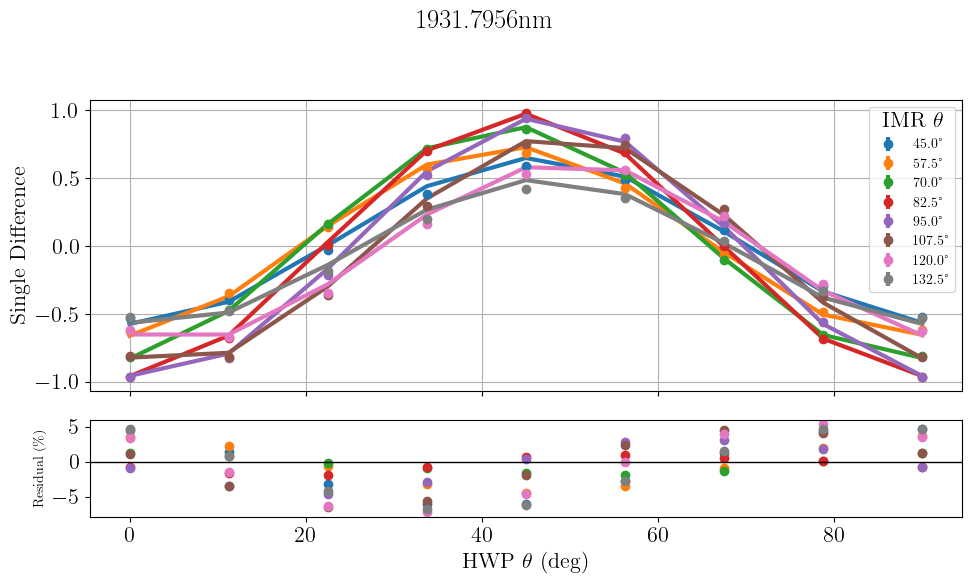

Updated Mueller Matrix:
[[ 0.2127581   0.19739079  0.00359418  0.07930933]
 [-0.2127581  -0.19739079 -0.00359418 -0.07930933]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.07251763191480975 0.05334785887154836
Error: [0.01031339 0.01031657 0.00384973]


/var/folders/2v/qmxm7kj51fg6kf7g36xrbysr0000gn/T/ipykernel_83452/921133854.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


In [5]:
# Test fitting with the wavelength bin we plotted earlier

error, fig2, ax2 = fit_CHARIS_Mueller_matrix_by_bin(filepath, 15, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal/bin4.json'),
    )
ax2.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  
)
ax2.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
ax2.minorticks_on()
fig2.suptitle('')
fig2.show()
#fig2.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/overleaf_plots/naive_model_single_diff_vs_hwp_1329.png',bbox_inches='tight', dpi=600)



Looks like our model improved! Note that the Joost't Hart paper used a more elaborate physical model, which I will incorporate later. These fits are a good starting point for more detailed models. Now we can fit for all bins and collect the errors.

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5434e+07                                    8.60e+07    
       1              2         6.8223e+06      8.61e+06       2.00e-01       2.14e+06    
       2              3         6.8162e+06      6.12e+03       5.68e-03       1.86e+04    
       3              4         6.8162e+06      5.07e-01       5.29e-05       5.39e+02    
       4              5         6.8162e+06      5.26e-04       1.69e-06       1.92e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.5434e+07, final cost 6.8162e+06, first-order optimality 1.92e+01.
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 3.150e+02  2.914e+02 ...  5.527e+02  4.834e+02]
           x: [ 4.325e+00  2.997e+00  1.000e+00]
        cost: 6816209.888101907
         jac: [[-3.891e+03 -2.023e+02  1.622e+03]
               [-3.

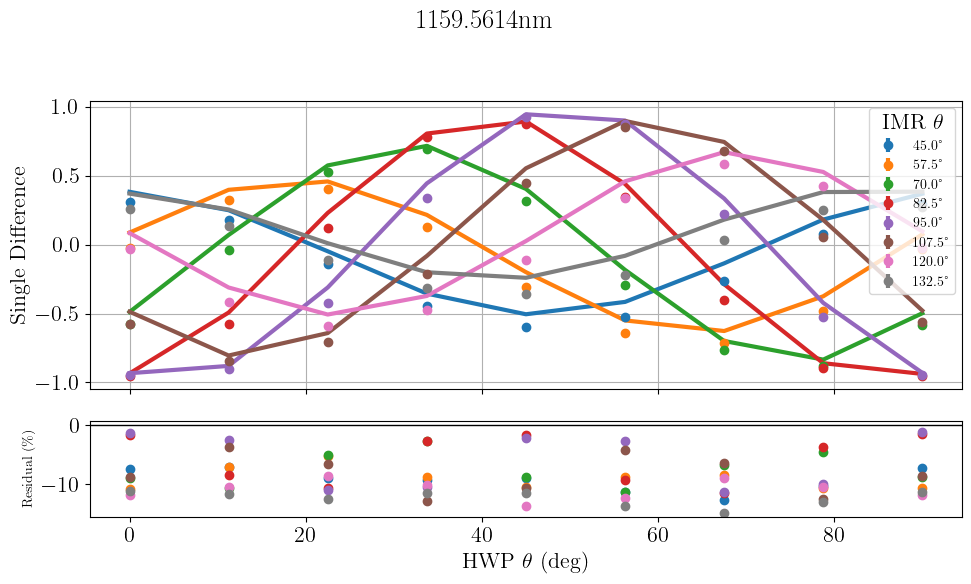

Updated Mueller Matrix:
[[ 0.69204168  0.69193713  0.01202876  0.        ]
 [-0.69204168 -0.69193713 -0.01202876  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14869425880906556 -0.012099809214635937
Error: [0.02328371 0.02373999 0.01194084]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3117e+07                                    1.10e+08    
       1              2         3.0775e+05      1.28e+07       2.34e-01       5.75e+06    
       2              3         2.2856e+05      7.92e+04       2.38e-02       1.31e+05    
       3              4         2.2853e+05      3.01e+01       4.28e-04       4.50e+02    
       4              5         2.2853e+05      3.57e-04       1.58e-06       3.21e+00    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.3117e+07, final cost 2.2853e+05, first-or

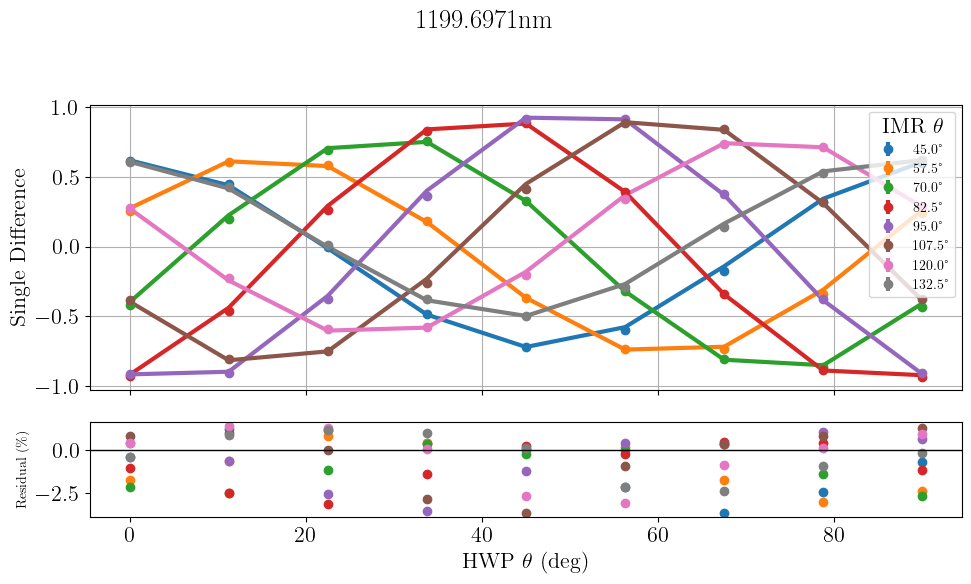

Updated Mueller Matrix:
[[ 0.81012191  0.80846724  0.025441   -0.04506648]
 [-0.81012191 -0.80846724 -0.025441    0.04506648]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.036430242959296366 0.014103963823629218
Error: [0.00486591 0.00479309 0.00236043]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0716e+07                                    1.08e+08    
       1              2         1.0252e+06      9.69e+06       1.79e-01       7.15e+06    
       2              3         9.6508e+05      6.01e+04       1.69e-02       4.12e+06    
       3              4         9.5988e+05      5.20e+03       4.43e-03       1.09e+04    
       4              5         9.5988e+05      6.39e-02       1.75e-05       3.27e+00    
       5              6         9.5988e+05      1.61e-08       1.06e-08       6.60e-02    
Both `ftol` and `xtol` terminati

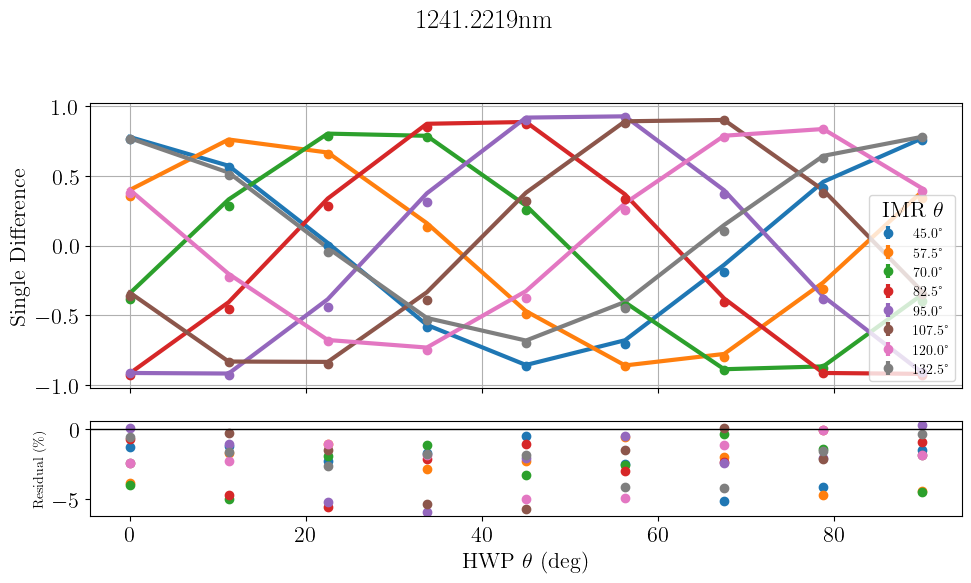

Updated Mueller Matrix:
[[ 0.88994352  0.88943994  0.02129266 -0.02103981]
 [-0.88994352 -0.88943994 -0.02129266  0.02103981]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.05908963715159665 0.0026766686087088543
Error: [0.01009791 0.00942226 0.00401864]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8964e+06                                    6.98e+07    
       1              2         1.5376e+06      4.36e+06       1.17e-01       7.27e+06    
       2              3         1.4245e+06      1.13e+05       3.25e-02       1.29e+06    
       3              4         1.4241e+06      3.67e+02       1.50e-03       2.73e+03    
       4              5         1.4241e+06      3.01e-02       1.90e-05       1.01e+02    
       5              6         1.4241e+06      2.76e-05       5.42e-07       3.26e+00    
`ftol` termination condition is 

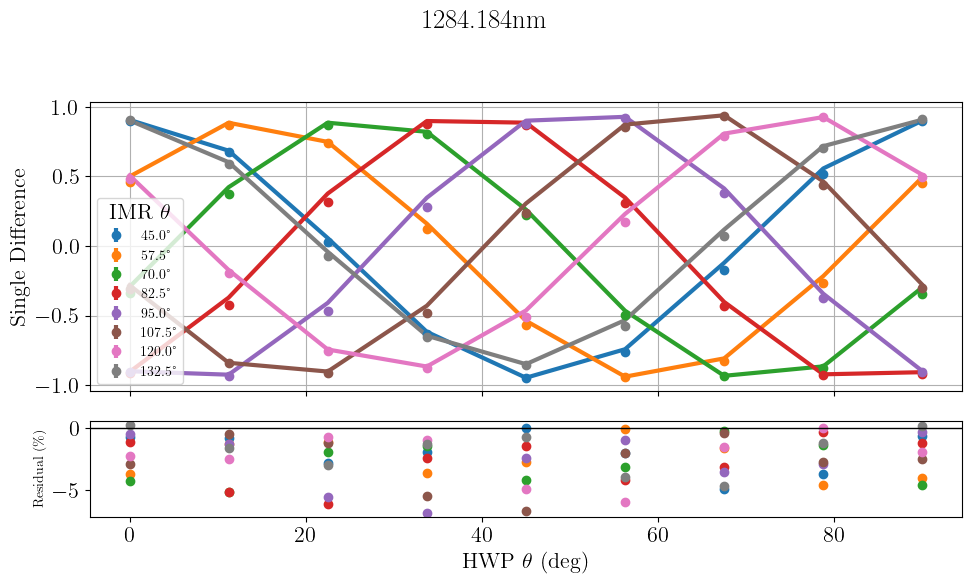

Updated Mueller Matrix:
[[ 0.95399322  0.95335888  0.02475793 -0.02443262]
 [-0.95399322 -0.95335888 -0.02475793  0.02443262]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.0682193726981361 0.0027147239652447475
Error: [0.01580057 0.01366375 0.00427949]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.7406e+06                                    2.79e+07    
       1              2         1.8503e+06      1.89e+06       1.14e-01       3.37e+07    
       2              3         1.6337e+06      2.17e+05       5.63e-02       6.47e+06    
       3              4         1.5650e+06      6.87e+04       4.80e-02       6.72e+06    
       4              5         1.5615e+06      3.52e+03       4.58e-03       1.22e+05    
       5              6         1.5614e+06      8.17e+01       1.07e-03       3.04e+04    
       6              7         1

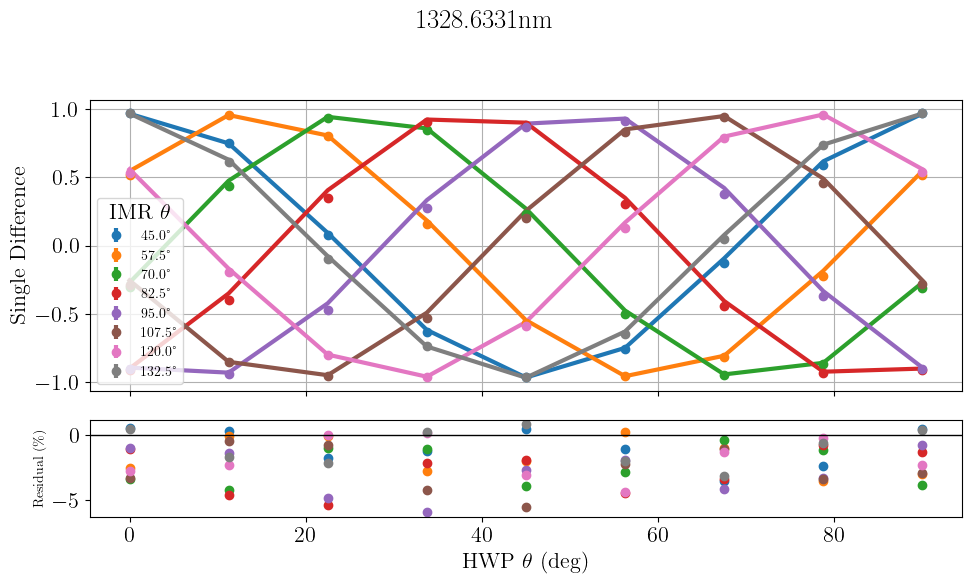

Updated Mueller Matrix:
[[ 0.98348449  0.98310454  0.02311739 -0.01458732]
 [-0.98348449 -0.98310454 -0.02311739  0.01458732]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.05926880507234089 0.008409354723955764
Error: [0.02596447 0.01986485 0.00385933]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.6283e+07                                    1.25e+09    
       1              2         2.9853e+07      2.64e+07       3.17e-01       9.54e+08    
       2              3         1.2046e+07      1.78e+07       7.02e-02       3.45e+07    
       3              4         1.2022e+07      2.43e+04       2.90e-03       5.44e+04    
       4              5         1.2022e+07      8.77e-01       4.38e-05       5.97e+02    
       5              6         1.2022e+07      2.04e-04       6.51e-07       7.46e+00    
`ftol` termination condition is s

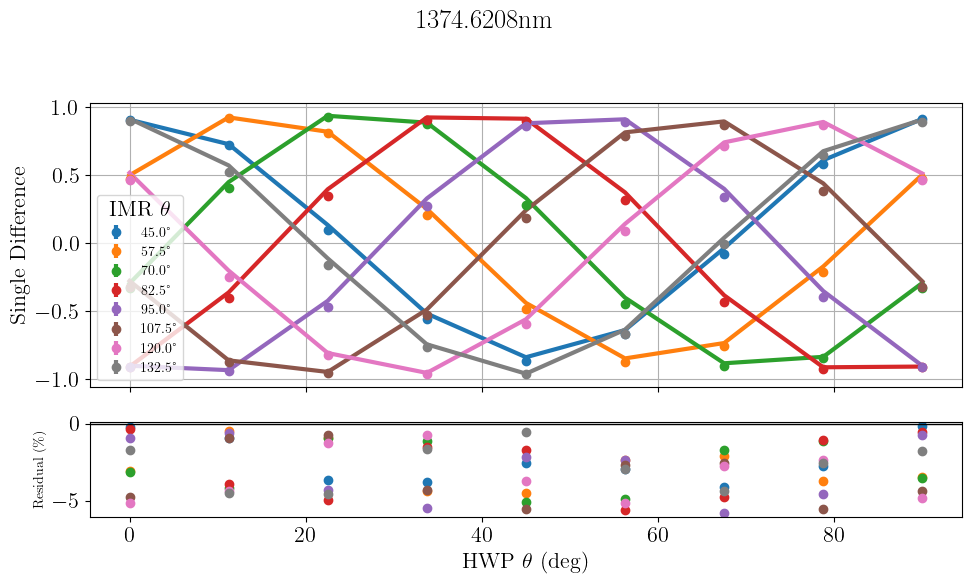

Updated Mueller Matrix:
[[ 0.95360338  0.95318152  0.01752589  0.02229886]
 [-0.95360338 -0.95318152 -0.01752589 -0.02229886]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.05783596763979476 -0.0017309336582495005
Error: [0.0180752  0.01531899 0.00474411]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4384e+07                                    4.54e+08    
       1              2         1.0631e+07      2.38e+07       2.41e-01       1.00e+08    
       2              3         9.0565e+06      1.57e+06       4.39e-02       3.96e+06    
       3              4         9.0549e+06      1.57e+03       1.25e-03       1.21e+04    
       4              5         9.0549e+06      8.30e-02       1.33e-05       1.38e+02    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 3.4384e+07, final cost 9.0549e+06, first-o

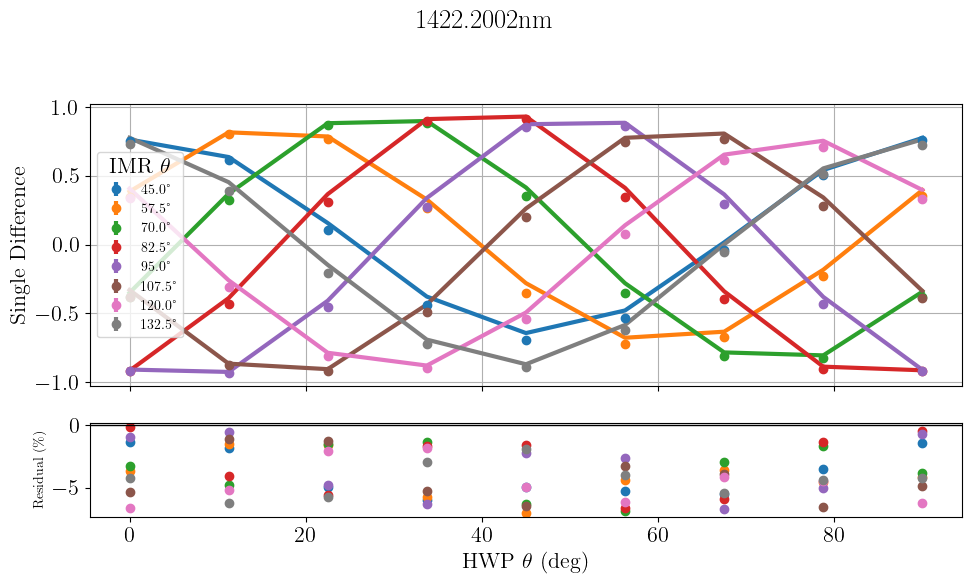

Updated Mueller Matrix:
[[ 0.88210167  0.88151894  0.0137228   0.02897216]
 [-0.88210167 -0.88151894 -0.0137228  -0.02897216]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.07007029358075784 -0.0016767958435542907
Error: [0.01568657 0.01452    0.006242  ]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2902e+07                                    2.51e+08    
       1              2         5.2245e+06      1.77e+07       1.56e-01       1.60e+07    
       2              3         5.1234e+06      1.01e+05       1.09e-02       1.24e+05    
       3              4         5.1234e+06      5.81e+00       7.96e-05       1.70e+03    
       4              5         5.1234e+06      1.03e-03       1.11e-06       2.67e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 2.2902e+07, final cost 5.1234e+06, first-o

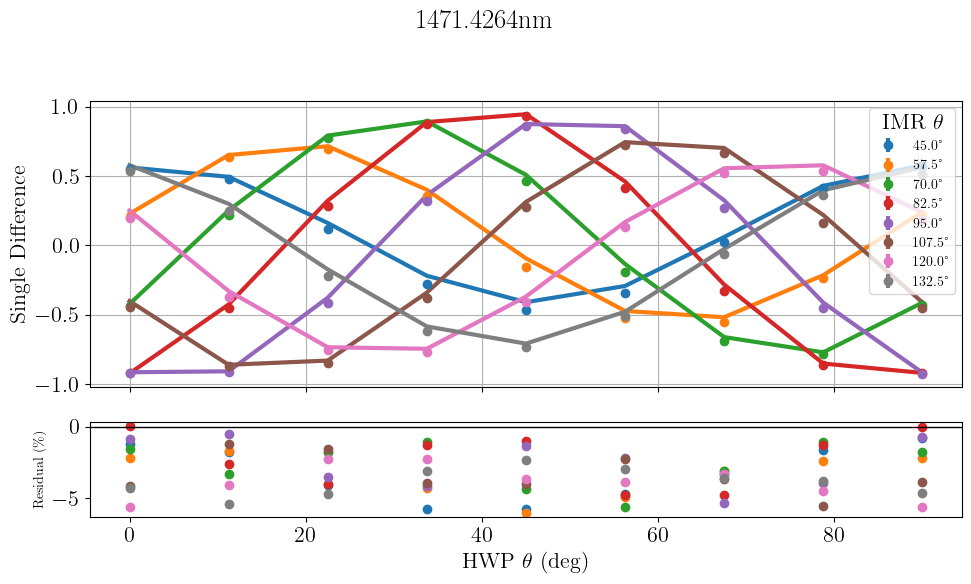

Updated Mueller Matrix:
[[ 0.78155711  0.78037996  0.00996597  0.04170505]
 [-0.78155711 -0.78037996 -0.00996597 -0.04170505]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.05997450978673169 0.00041316123845758224
Error: [0.00988855 0.00984217 0.00490172]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4471e+07                                    1.78e+08    
       1              2         4.6650e+06      9.81e+06       1.07e-01       3.62e+06    
       2              3         4.6574e+06      7.62e+03       2.98e-03       5.91e+04    
       3              4         4.6574e+06      1.14e+00       3.66e-05       1.33e+03    
       4              5         4.6574e+06      5.85e-04       8.29e-07       3.02e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.4471e+07, final cost 4.6574e+06, first-o

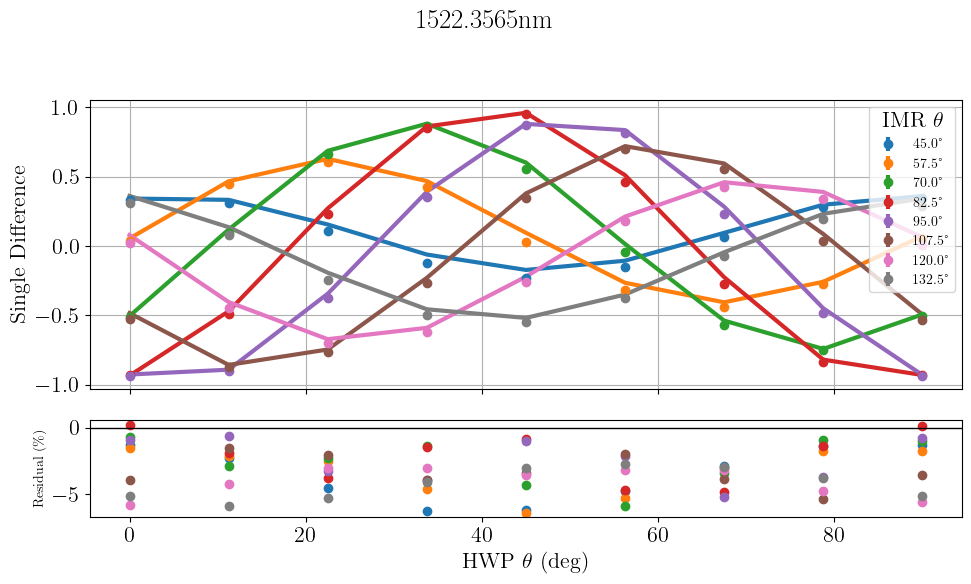

Updated Mueller Matrix:
[[ 0.67157698  0.66965587  0.00659607  0.05033044]
 [-0.67157698 -0.66965587 -0.00659607 -0.05033044]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.06362609920145368 0.002170947661342959
Error: [0.00884942 0.00914897 0.004801  ]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.3323e+06                                    1.03e+08    
       1              2         4.6830e+06      2.65e+06       4.76e-02       4.86e+05    
       2              3         4.6829e+06      6.22e+01       2.18e-04       1.08e+04    
       3              4         4.6829e+06      2.99e-02       5.27e-06       2.93e+02    
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 7.3323e+06, final cost 4.6829e+06, first-order optimality 2.93e+02.
     message: `ftol` termination condition is satisfied.
     succe

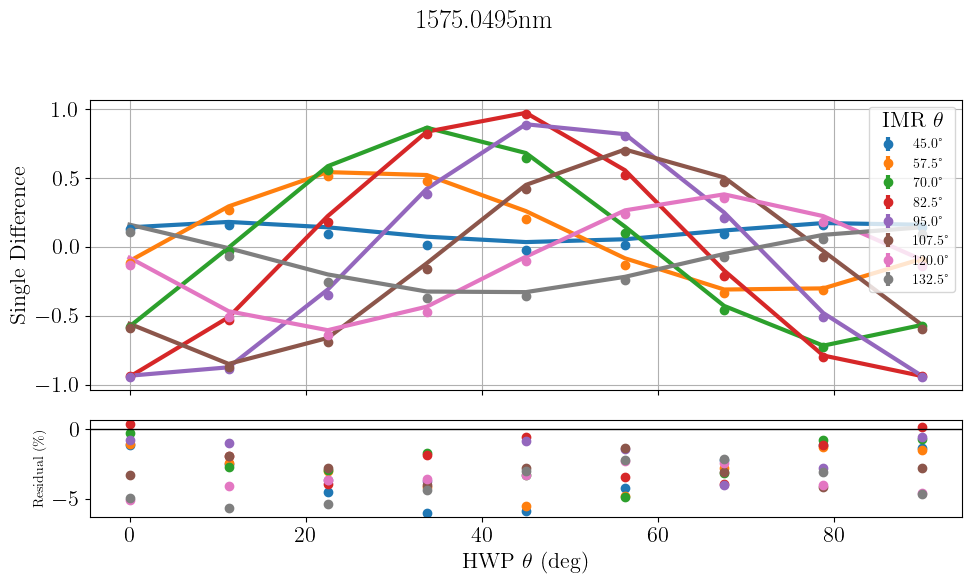

Updated Mueller Matrix:
[[ 0.57075876  0.56857515  0.00477404  0.04964952]
 [-0.57075876 -0.56857515 -0.00477404 -0.04964952]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.059994183926216846 0.00321768019396651
Error: [0.00771765 0.00809787 0.00418328]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.1289e+06                                    8.09e+07    
       1              2         3.3077e+06      8.21e+05       2.04e-02       1.05e+06    
       2              3         3.3075e+06      2.25e+02       3.93e-04       2.41e+04    
       3              4         3.3075e+06      1.12e-01       8.91e-06       5.68e+02    
       4              5         3.3075e+06      6.18e-05       2.10e-07       1.35e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 4.1289e+06, final cost 3.3075e+06, first-ord

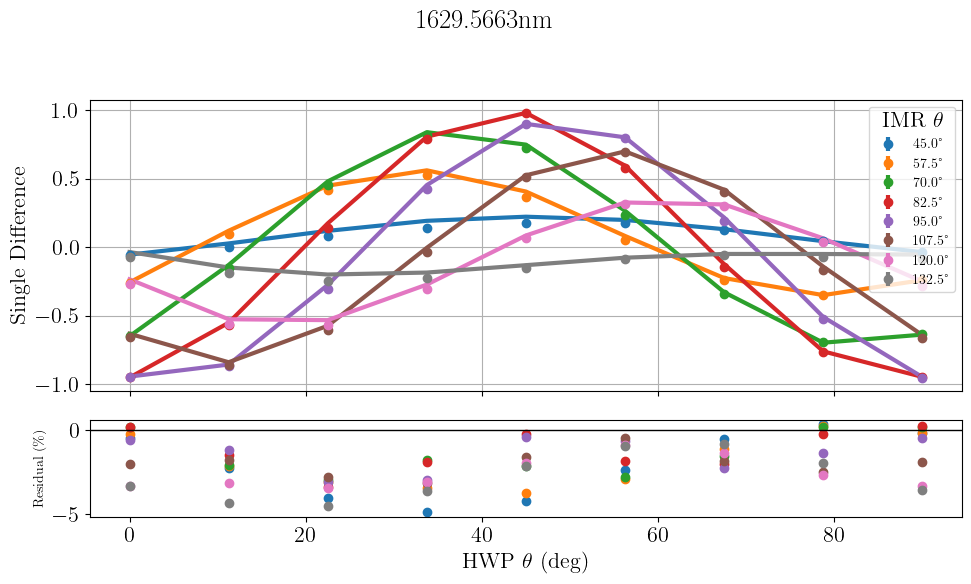

Updated Mueller Matrix:
[[ 0.47282743  0.46922693  0.00255656  0.05818366]
 [-0.47282743 -0.46922693 -0.00255656 -0.05818366]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.04891240609937836 0.003406185289489841
Error: [0.00562547 0.00589089 0.00289499]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.5354e+06                                    1.31e+08    
       1              2         2.6172e+06      1.92e+06       3.15e-02       1.29e+06    
       2              3         2.6168e+06      4.32e+02       5.55e-04       3.27e+04    
       3              4         2.6168e+06      2.17e-01       1.28e-05       7.83e+02    
       4              5         2.6168e+06      1.24e-04       3.06e-07       1.89e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 4.5354e+06, final cost 2.6168e+06, first-ord

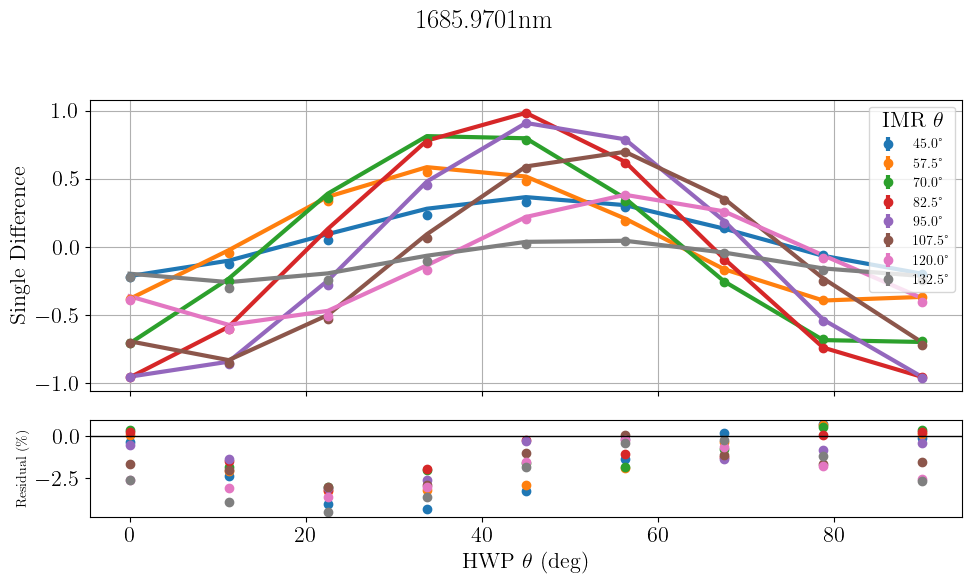

Updated Mueller Matrix:
[[ 0.39364929  0.38946441  0.00193748  0.05721439]
 [-0.39364929 -0.38946441 -0.00193748 -0.05721439]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.04581807144501168 0.007306820254701911
Error: [0.00516751 0.00537355 0.00246581]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3322e+07                                    2.48e+08    
       1              2         4.8506e+06      8.47e+06       6.94e-02       3.71e+06    
       2              3         4.8499e+06      7.52e+02       5.17e-04       3.59e+04    
       3              4         4.8499e+06      2.50e-01       1.32e-05       1.32e+03    
       4              5         4.8499e+06      3.35e-04       4.84e-07       4.88e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.3322e+07, final cost 4.8499e+06, first-ord

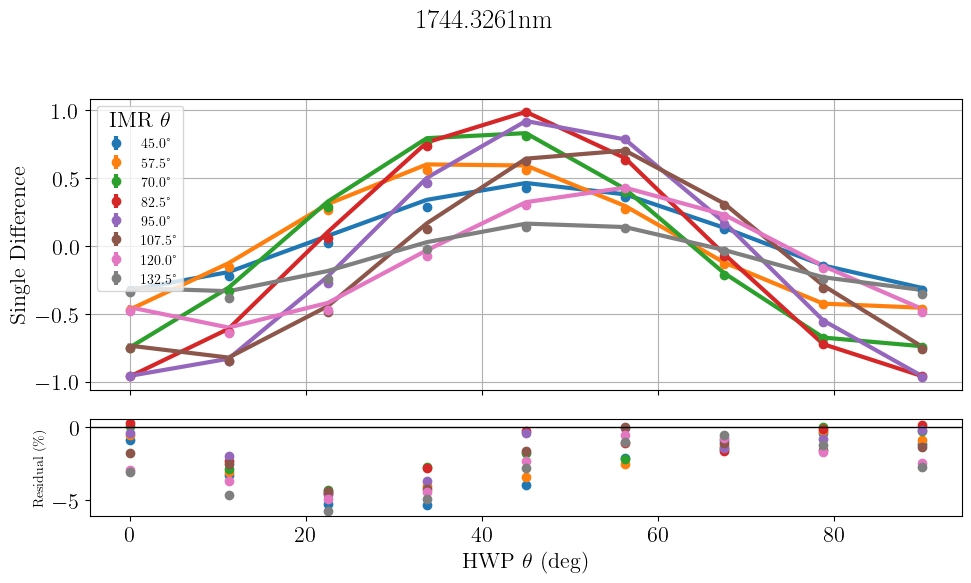

Updated Mueller Matrix:
[[ 0.33745775  0.33341343  0.00209897  0.05204624]
 [-0.33745775 -0.33341343 -0.00209897 -0.05204624]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.057562272799769054 0.0026406492492047073
Error: [0.00679887 0.00706793 0.00300939]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.1836e+07                                    7.75e+08    
       1              2         5.6694e+06      3.62e+07       1.08e-01       2.24e+07    
       2              3         5.6546e+06      1.48e+04       1.75e-03       1.41e+05    
       3              4         5.6546e+06      2.01e+00       2.76e-05       3.29e+03    
       4              5         5.6546e+06      1.11e-03       6.50e-07       7.70e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 4.1836e+07, final cost 5.6546e+06, first-o

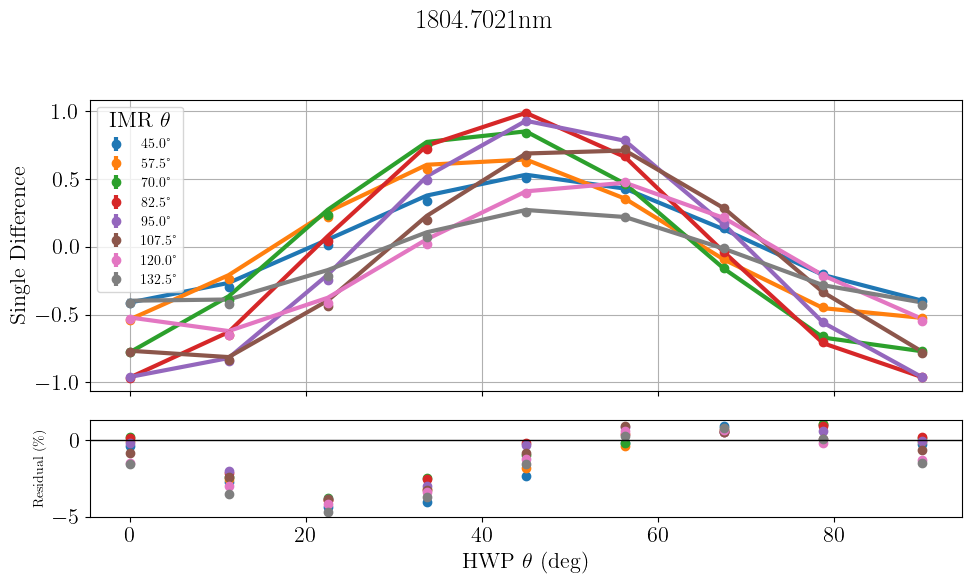

Updated Mueller Matrix:
[[ 0.29435141  0.28900098  0.00214798  0.05582627]
 [-0.29435141 -0.28900098 -0.00214798 -0.05582627]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.04721537444116855 0.010150370278097287
Error: [0.00545097 0.00560062 0.0023074 ]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8646e+08                                    3.23e+09    
       1              2         3.1931e+07      1.55e+08       9.77e-02       4.23e+08    
       2              3         3.1018e+07      9.13e+05       5.96e-03       1.85e+06    
       3              4         3.1017e+07      1.15e+02       1.19e-04       5.31e+04    
       4              5         3.1017e+07      9.21e-02       3.37e-06       1.51e+03    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.8646e+08, final cost 3.1017e+07, first-ord

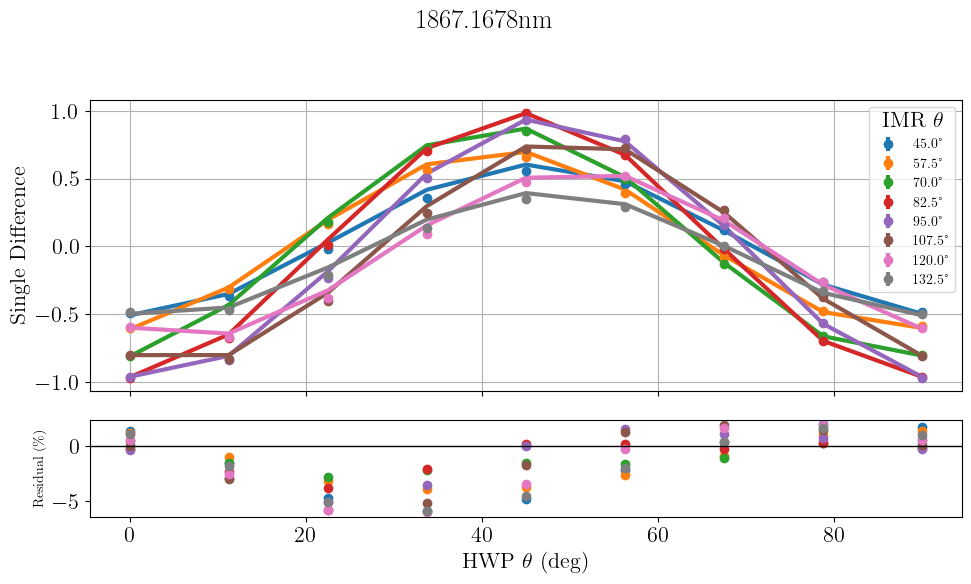

Updated Mueller Matrix:
[[ 0.24610405  0.23733151  0.00246804  0.06507584]
 [-0.24610405 -0.23733151 -0.00246804 -0.06507584]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.06064310431357675 0.020008343003537543
Error: [0.00742035 0.00756938 0.00290064]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1019e+08                                    1.78e+09    
       1              2         2.3729e+07      8.65e+07       9.15e-02       2.95e+08    
       2              3         2.2599e+07      1.13e+06       1.14e-02       1.01e+06    
       3              4         2.2599e+07      3.66e+01       9.48e-05       8.73e+03    
       4              5         2.2599e+07      6.27e-03       1.41e-06       1.34e+02    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.1019e+08, final cost 2.2599e+07, first-ord

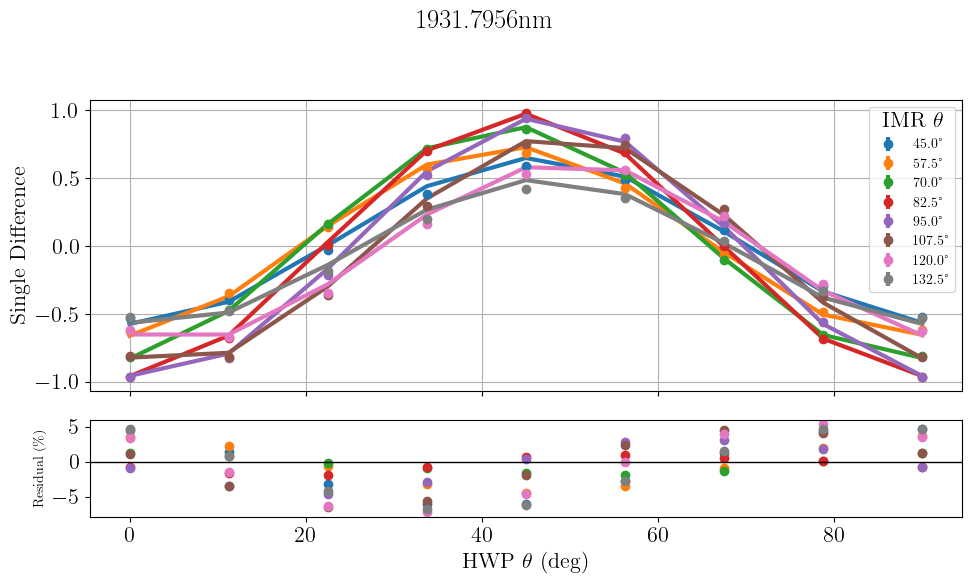

Updated Mueller Matrix:
[[ 0.2127581   0.19739079  0.00359418  0.07930933]
 [-0.2127581  -0.19739079 -0.00359418 -0.07930933]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.07251763191480975 0.05334785887154836
Error: [0.01031339 0.01031657 0.00384973]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1458e+08                                    1.63e+09    
       1              2         3.4990e+07      7.96e+07       8.73e-02       2.99e+08    
       2              3         3.3609e+07      1.38e+06       1.42e-02       1.24e+06    
       3              4         3.3608e+07      3.48e+01       9.14e-05       5.49e+03    
       4              5         3.3608e+07      3.45e-03       1.24e-06       7.96e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.1458e+08, final cost 3.3608e+07, first-orde

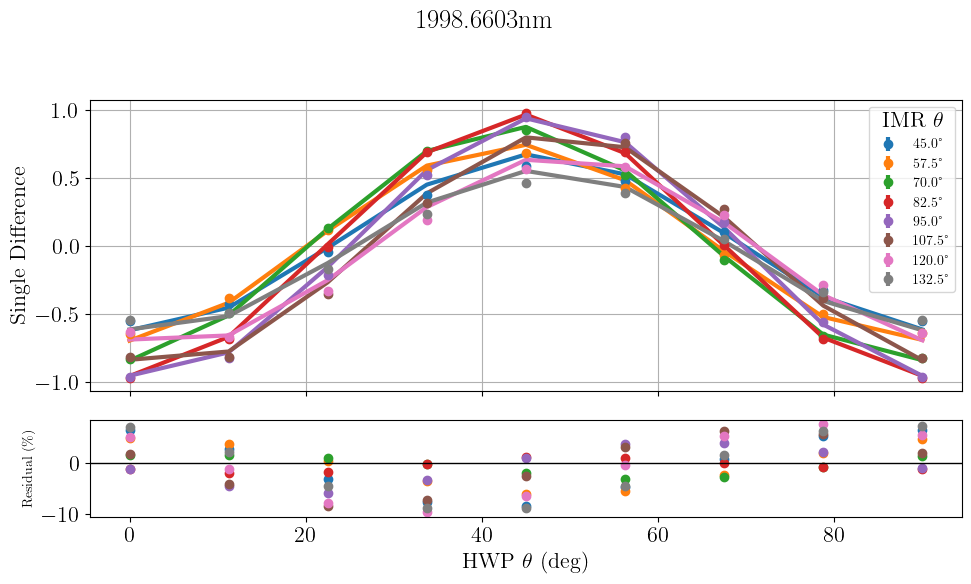

Updated Mueller Matrix:
[[ 0.19010402  0.17005019  0.00545908  0.08480961]
 [-0.19010402 -0.17005019 -0.00545908 -0.08480961]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.09736004972387485 0.07646808406960959
Error: [0.01498663 0.01484418 0.00526511]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2051e+08                                    1.63e+09    
       1              2         4.0645e+07      7.99e+07       8.73e-02       2.71e+08    
       2              3         3.9029e+07      1.62e+06       1.96e-02       1.99e+06    
       3              4         3.9029e+07      5.85e+01       6.54e-05       1.09e+03    
       4              5         3.9029e+07      1.70e-04       3.08e-07       1.03e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.2051e+08, final cost 3.9029e+07, first-orde

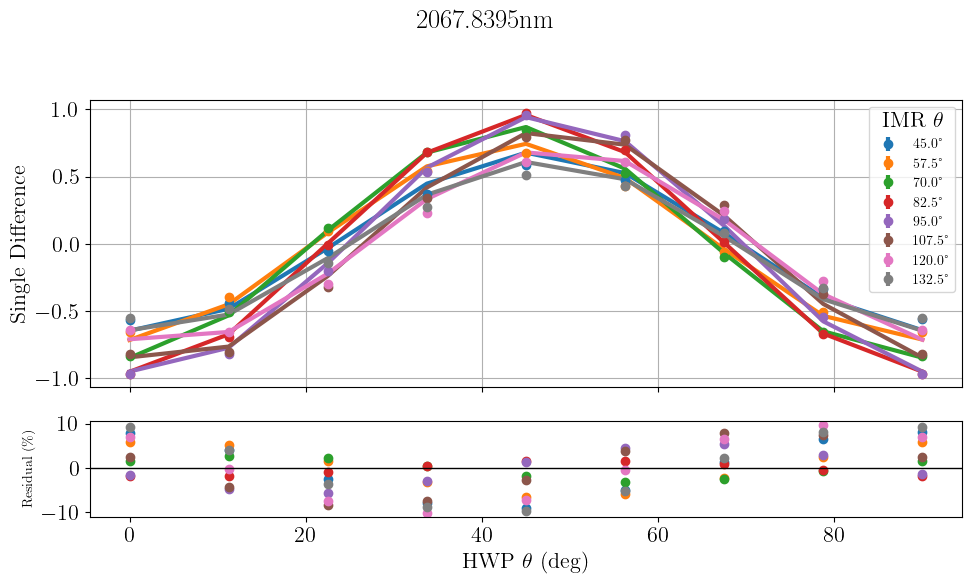

Updated Mueller Matrix:
[[ 0.17746332  0.15023558  0.00887859  0.09404079]
 [-0.17746332 -0.15023558 -0.00887859 -0.09404079]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.10083306742737061 0.09621801814054276
Error: [0.01832443 0.01787681 0.00635259]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0949e+08                                    1.38e+09    
       1              2         4.0330e+07      6.92e+07       8.75e-02       2.32e+08    
       2              3         3.8497e+07      1.83e+06       2.68e-02       3.08e+06    
       3              4         3.8497e+07      1.92e+02       1.63e-04       1.25e+03    
       4              5         3.8497e+07      2.93e-04       4.67e-07       4.55e+00    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.0949e+08, final cost 3.8497e+07, first-orde

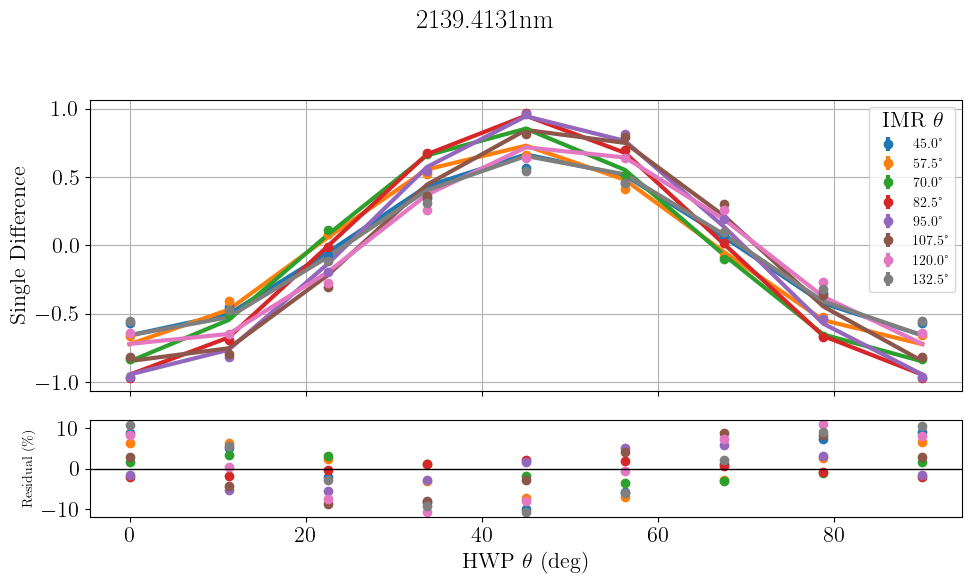

Updated Mueller Matrix:
[[ 0.17042116  0.13940395  0.01306469  0.09715567]
 [-0.17042116 -0.13940395 -0.01306469 -0.09715567]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.10831714355847988 0.10930599036977029
Error: [0.02113304 0.0204429  0.00717109]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1365e+08                                    1.27e+09    
       1              2         4.5384e+07      6.83e+07       9.30e-02       2.06e+08    
       2              3         4.3466e+07      1.92e+06       3.17e-02       4.37e+06    
       3              4         4.3461e+07      4.42e+03       2.03e-03       2.47e+05    
       4              5         4.3461e+07      1.35e+01       1.16e-04       1.41e+04    
       5              6         4.3461e+07      4.36e-02       6.57e-06       8.00e+02    
`ftol` termination condition is sa

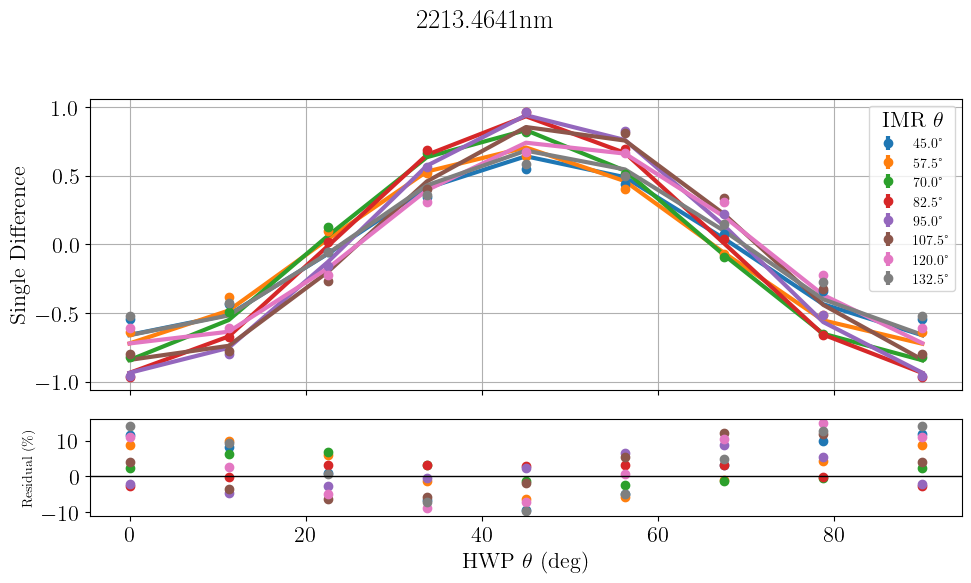

Updated Mueller Matrix:
[[ 0.16990497  0.12994783  0.01845153  0.10789256]
 [-0.16990497 -0.12994783 -0.01845153 -0.10789256]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.09771983844534182 0.14839009463075417
Error: [0.02578284 0.02429038 0.00883491]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.6660e+07                                    9.69e+08    
       1              2         3.1838e+07      5.48e+07       9.75e-02       1.52e+08    
       2              3         2.9632e+07      2.21e+06       4.49e-02       4.42e+06    
       3              4         2.9631e+07      7.04e+02       3.45e-04       3.16e+03    
       4              5         2.9631e+07      3.42e-03       2.13e-06       4.71e+01    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 8.6660e+07, final cost 2.9631e+07, first-orde

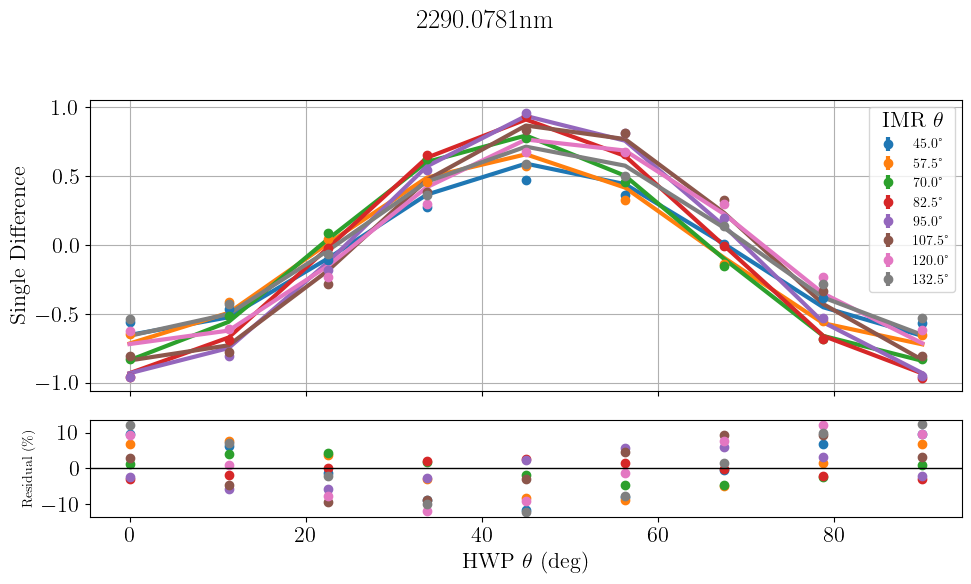

Updated Mueller Matrix:
[[ 0.17374969  0.12886654  0.02628117  0.11354149]
 [-0.17374969 -0.12886654 -0.02628117 -0.11354149]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.12327116401105842 0.12382395667628099
Error: [0.02510216 0.02418261 0.00881994]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1065e+08                                    7.50e+08    
       1              2         6.0986e+07      4.97e+07       1.13e-01       1.22e+08    
       2              3         5.9937e+07      1.05e+06       2.49e-02       6.61e+06    
       3              4         5.9923e+07      1.37e+04       5.61e-03       1.72e+06    
       4              5         5.9923e+07      9.33e+02       1.47e-03       4.51e+05    
       5              6         5.9922e+07      6.37e+01       3.83e-04       1.18e+05    
       6              7         5.

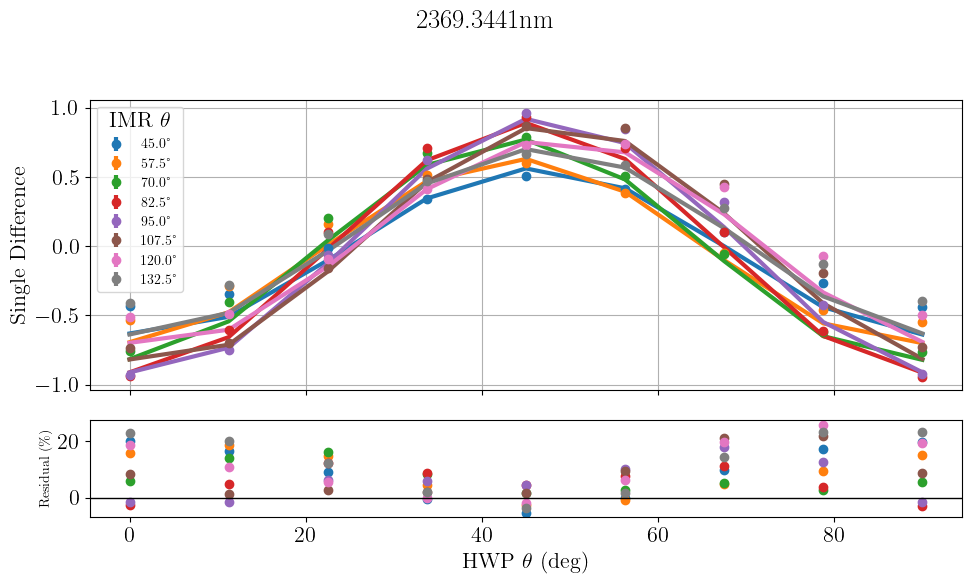

Updated Mueller Matrix:
[[ 0.1846787   0.12433584  0.03184815  0.13278748]
 [-0.1846787  -0.12433584 -0.03184815 -0.13278748]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.0528911986332965 0.2596007488908632
Error: [0.04371617 0.03866159 0.01631313]


In [6]:
# Fit all 22 wavelength bins
errors = []
for bin in range(0,22):
    error = fit_CHARIS_Mueller_matrix_by_bin(
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin{bin}_no_pickoff.csv'),
        bin,
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/sys_dics_justrets/sysdictbin{bin}nopick.json'),
        plot_path=Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/plots_justrets/bin{bin}nopick.png')
    )[0]
    errors.append(error)


In [3]:
# find average error
errors = np.array(errors)
print('hwp_ret', np.mean(errors[:,0]))
print('hwp_offset', np.mean(errors[:,1]))
print('imr_ret',np.mean(errors[:,2]))
print('imr_offset', np.mean(errors[:,3]))
print('epsilon_cal', np.mean(errors[:,4]))
print('cal_offset', np.mean(errors[:,5]))



    

hwp_ret 0.014762431439778644
hwp_offset 0.7993313304566605
imr_ret 0.014080387873167772
imr_offset 8.220900376649041
epsilon_cal 0.005443220711359929
cal_offset 16.115567961973106


In [4]:
# Now let's make a dataframe of our data, this model data function can be changed easily to include
# whatever parameters you're fitting
json_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/sys_dicts_hugeoffsets'
df = model_data(json_dir)
df

,wavelength_bin,hwp_retardance,imr_retardance,calibration_polarizer_diattenuation,hwp_offset,hwp_offset_std,imr_offset,imr_offset_std,cal_offset,cal_offset_std
0,1159.5614,2.996883,4.324849,1.000000,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
1,1199.6971,2.990267,4.042791,0.992366,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
2,1241.2219,2.992739,3.821016,0.997484,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
3,1284.1840,3.010514,3.555204,0.991932,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
4,1328.6331,3.128423,3.332928,0.987980,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
5,1374.6208,2.985290,2.733173,0.994387,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
6,1422.2002,2.956612,2.456511,0.996322,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
7,1471.4264,2.954017,2.183394,0.995211,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
8,1522.3565,2.951260,1.933722,0.994209,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751
9,1575.0495,2.953121,1.722730,0.994495,-1.446684,0.789504,0.020518,0.53192,0.081171,0.894751


# Step 5: Refine Model

This step depends heavily on what components you are fitting to. I'm going to make the IMR and HWP retardances a function of wavelength using the Joost t Hart 2021 physical models. I'll use the parameters we just fitted as my dataset. 

In [5]:
def phys_model_chisq(p0, wavelengths, retardances_hwp, errors_hwp, retardances_imr,errors_imr):
    """
    Calculate the chi squared for the physical model of CHARIS.
    
    Parameters:
    -----------
    p0 : list
        List of parameters [w_sio2, w_mgf2, d].
    
    wavelengths : numpy array
        Array of wavelengths that are in the data.

    retardances_hwp : list or numpy array
        Retardances of the HWP at the specified wavelengths.

    errors_hwp : list or numpy array
        Errors associated with the HWP retardances.

    retardances_imr : list or numpy array
        Retardances of the IMR at the specified wavelengths.
    
    errors_imr : list or numpy array
        Errors associated with the IMR retardances.
    
    Returns:
    --------
    float
        The chi squared value.
    """
    # Get model retardances
    model_hwp = HWP_retardance(wavelengths, p0[0], p0[1])
    model_imr = IMR_retardance(wavelengths, p0[2])
    # Calculate residuals
    residuals_hwp = (retardances_hwp - model_hwp) / errors_hwp
    residuals_imr = (retardances_imr - model_imr) / errors_imr
    # Calculate log-likelihood
    chisq_hwp = np.sum(residuals_hwp**2)
    chisq_imr = np.sum(residuals_imr**2)
    return chisq_hwp + chisq_imr

In [6]:

# Minimizing the physical model

p0 = [1.623, 1.268, 262.56] # starting guesses from Joost t Hart 2021
wavelengths = wavelength_bins # CHARIS wavelength bins

# Defining reasonable bounds (these values shouldn't have changed much)
  
wsio2_bounds = (0.9*p0[0], 1.1*p0[0])
wmgf2_bounds = (0.9*p0[1], 1.1*p0[1])
d_bounds = (0.9*p0[2], 1.1*p0[2])
bounds = [wsio2_bounds, wmgf2_bounds, d_bounds]

# Extract our retardances and errors from the data
errors = np.array(errors)
hwp_retardances = df['hwp_retardance'].values
imr_retardance = df['imr_retardance'].values
hwp_errors = errors[:,0] 
imr_errors = errors[:,2]  

# Use a while loop to iteratively minimize the chi squared function
# Counters for iterative fitting

iteration = 1
previous_chisq = 1000000
new_chisq = 0

while abs(previous_chisq-new_chisq)> 0.01*abs(previous_chisq):
        previous_chisq = new_chisq
        result = minimize(phys_model_chisq,p0, args=(wavelengths, hwp_retardances, hwp_errors, imr_retardance, imr_errors), bounds=bounds)
        p0 = result.x
        new_chisq = result.fun
        iteration += 1
        print(result)

hess_inv = result.hess_inv


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5904.214542430929
        x: [ 1.656e+00  1.292e+00  2.571e+02]
      nit: 10
      jac: [ 4.111e-01 -5.331e-01 -3.638e-03]
     nfev: 88
     njev: 22
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5904.214542430922
        x: [ 1.656e+00  1.292e+00  2.571e+02]
      nit: 1
      jac: [ 3.167e-01 -4.057e-01 -6.730e-03]
     nfev: 16
     njev: 4
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


That's It! The fit is updated. However, in the Hart 2021 paper, a degeneracy in wavelength bin 4 was noted. Because of this, I will redo the fit to see if the model fits better. 

In [7]:
# Redo the fit without the degenerate point (bin 4)

wavelengths2 = np.delete(wavelength_bins, 4)
p0_2 = [1.623, 1.268, 262.56] # starting guesses from Joost t Hart 2021

# Defining reasonable bounds (these values shouldn't have changed much)

wsio2_bounds2 = (0.9*p0_2[0], 1.1*p0_2[0])
wmgf2_bounds2 = (0.9*p0_2[1], 1.1*p0_2[1])
d_bounds2 = (0.9*p0_2[2], 1.1*p0_2[2])
bounds2 = [wsio2_bounds2, wmgf2_bounds2, d_bounds2]

# Extract our retardances and errors from the data
errors2 = np.delete(np.array(errors), 4, axis=0)
hwp_retardances2 = df['hwp_retardance'].values
imr_retardance2 = df['imr_retardance'].values
hwp_errors2 = errors2[:,0] 
imr_errors2 = errors2[:,2]  

# Remove the corresponding retardances for the removed bin

hwp_retardances2 = np.delete(hwp_retardances2, 4)
imr_retardance2= np.delete(imr_retardance2,4)

# Use a while loop to iteratively minimize the chi squared function

# Counters for iterative fitting

iteration2 = 1
previous_logl2 = 1000000
new_logl2 = 0

while abs(previous_logl2-new_logl2)> 0.01*abs(previous_logl2):
        previous_logl2 = new_logl2
        result2 = minimize(phys_model_chisq,p0_2, args=(wavelengths2, hwp_retardances2, hwp_errors2, imr_retardance2, imr_errors2), bounds=bounds2)
        p0_2 = result2.x
        new_logl2 = result2.fun
        iteration2 += 1
        print(result2)






  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5793.9502050919355
        x: [ 1.656e+00  1.293e+00  2.570e+02]
      nit: 10
      jac: [ 7.276e-01 -9.416e-01  2.001e-03]
     nfev: 80
     njev: 20
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5793.950205091874
        x: [ 1.656e+00  1.293e+00  2.570e+02]
      nit: 1
      jac: [ 1.073e-02  2.083e-02 -1.182e-03]
     nfev: 12
     njev: 3
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


In [14]:
# Compare chi sq of all models

p0_Hart = [1.623, 1.268, 262.56]

# Hart chi sq

print("Hart:",phys_model_chisq(p0_Hart,wavelengths, hwp_retardances,hwp_errors,imr_retardance,imr_errors))

# Our model with all bins

print("Our model with all bins:",phys_model_chisq(result.x,wavelengths, hwp_retardances,hwp_errors,imr_retardance,imr_errors))

# Our model without bin 4

print("Our model without bin 4:",phys_model_chisq(result2.x,wavelengths2, hwp_retardances2,hwp_errors2,imr_retardance2,imr_errors2))



Hart: 12691.82161666812
Our model with all bins: 5910.4946780866585
Our model without bin 4: 5811.103663670211
